In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils.visualize as viz
from utils.ode import map_equation, hydrogen_bromine, hydrogen_bromine_init

%load_ext autoreload
%autoreload 2

In [2]:
dt = 0.002
visualize = viz.ODEResultVisualizer(
    fun=hydrogen_bromine,
    x0=hydrogen_bromine_init,
    t=np.arange(0, 1e1, dt),
    result_dir="../experiments/results/hbr_analytic_20251002-122758",
    labels=["Br2", "Br", "H2", "H", "HBr", "M"],
)
visualize.solve()

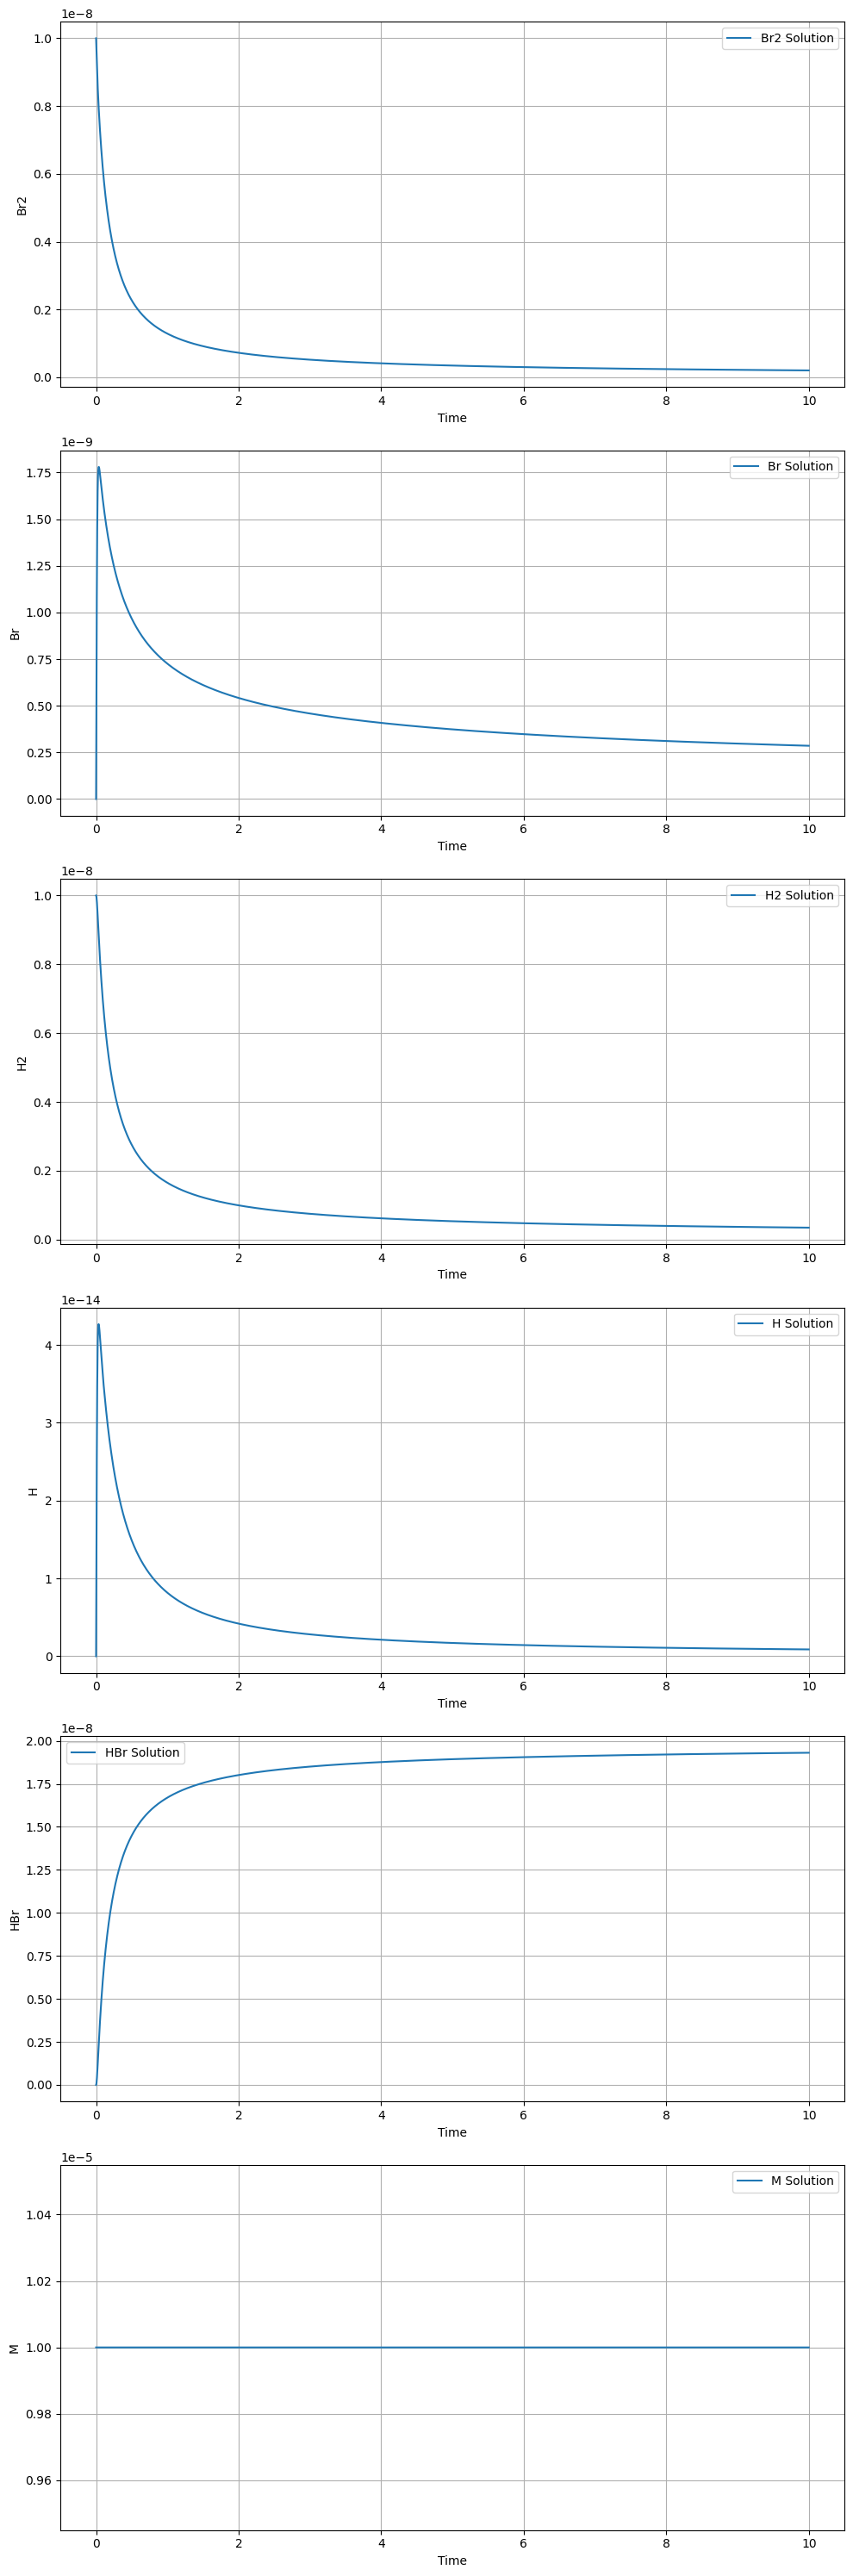

In [3]:
visualize.plot_solution()

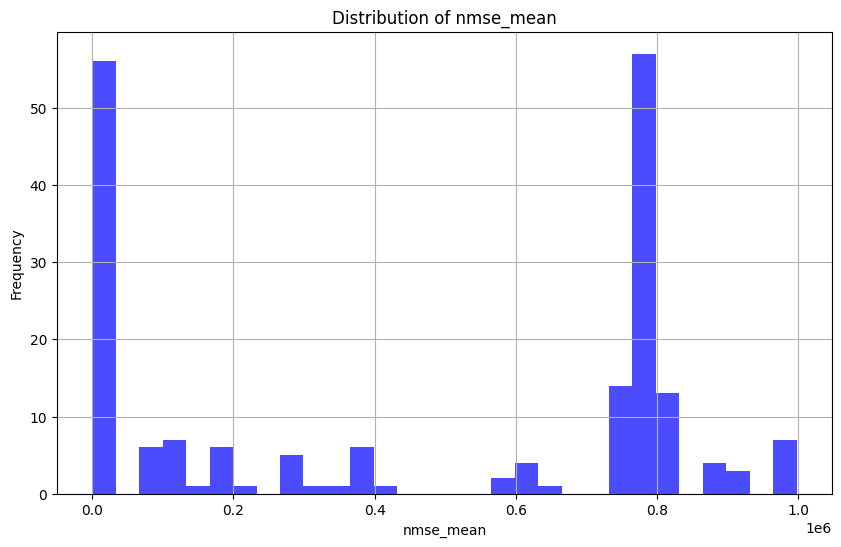

In [4]:
visualize.plot_metric_distribution('nmse_mean')

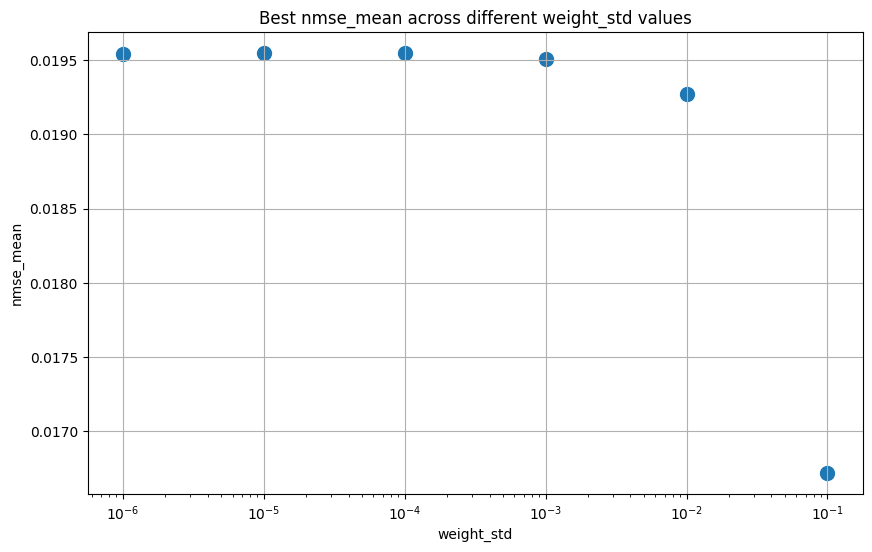

In [5]:
visualize.plot_best_model_across_param(param="weight_std", metric="nmse_mean")

Heatmap saved to heatmap_model_alpha_weight_eps_nmse_mean.png


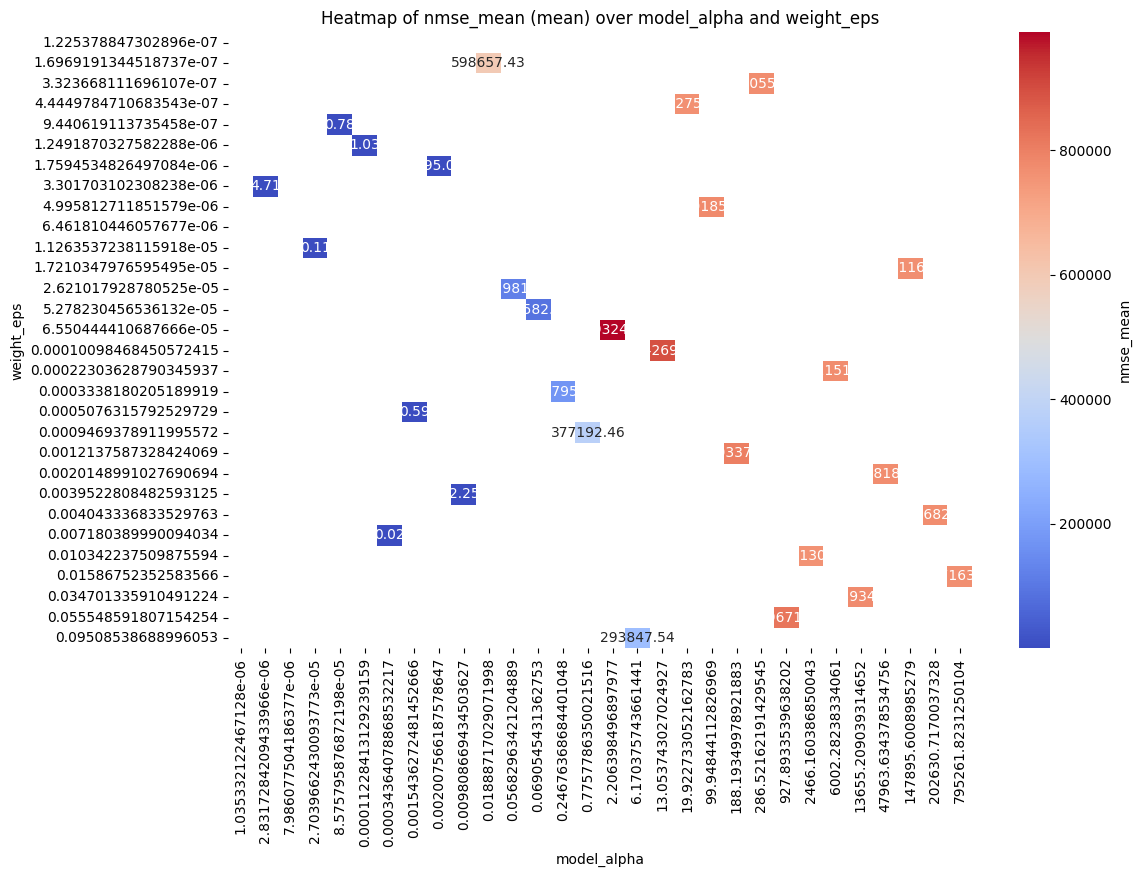

In [6]:
visualize.plot_parameter_heatmap(
    param_x="model_alpha",
    param_y="weight_eps",
    metric="nmse_mean",
    fixed_params={'weight_std': 0},
    save=True
)

In [11]:
df = visualize.results_df
df.to_csv('temp_data.csv', index=False)

In [8]:
visualize.get_best_model('nmse_mean', fixed_params={'weight_std': 1e-1})

model                         195_model
nmse_0                         0.009433
nmse_1                         0.001128
nmse_2                         0.001538
nmse_3                         0.087632
nmse_4                         0.000584
nmse_5                              0.0
nmse_mean                      0.016719
data_file      hydrogen_bromine_ode.csv
equation               hydrogen_bromine
model_alpha                    0.000344
weight_eps                      0.00718
weight_std                          0.1
Name: 148, dtype: object

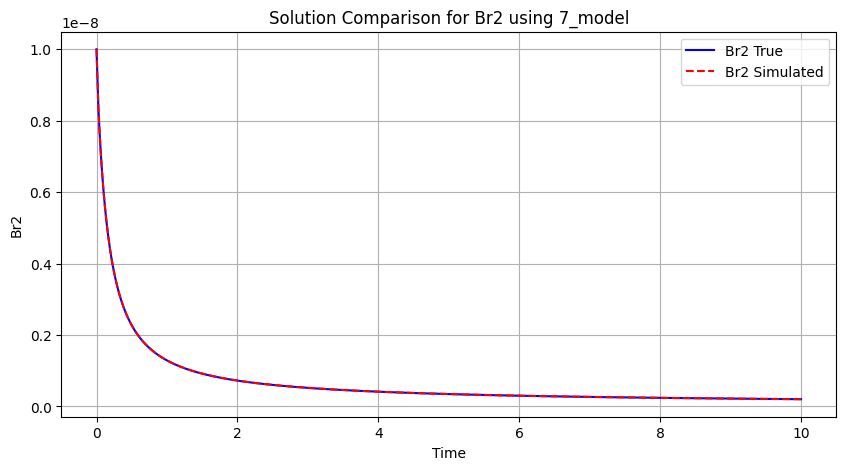

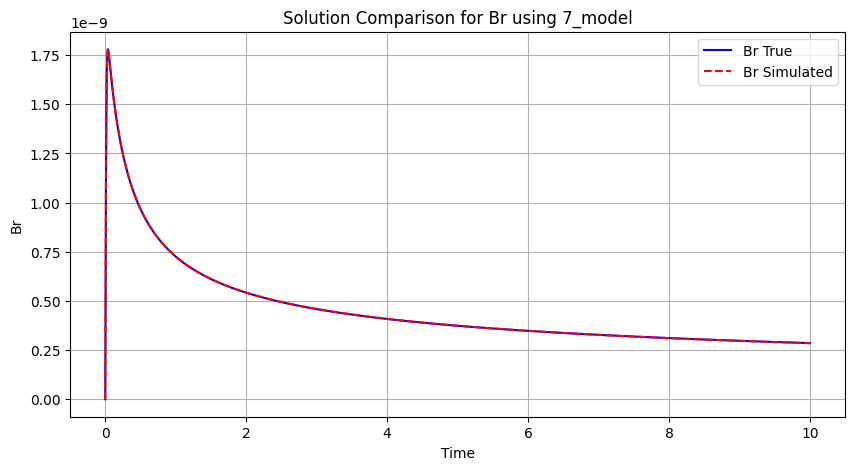

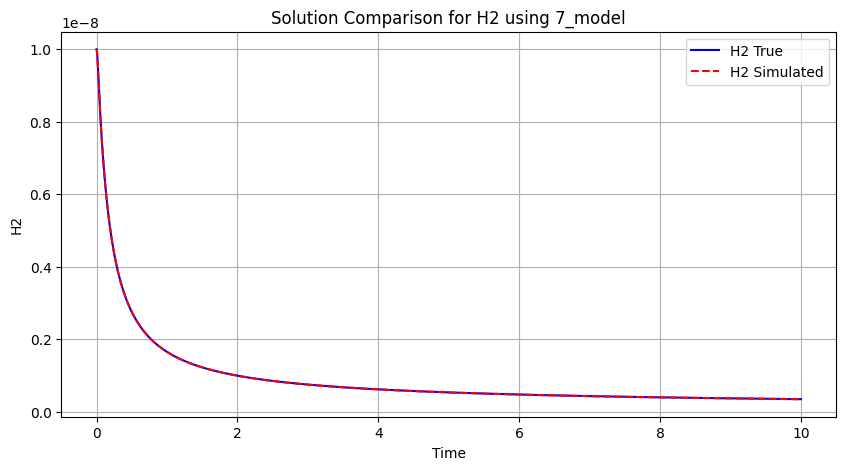

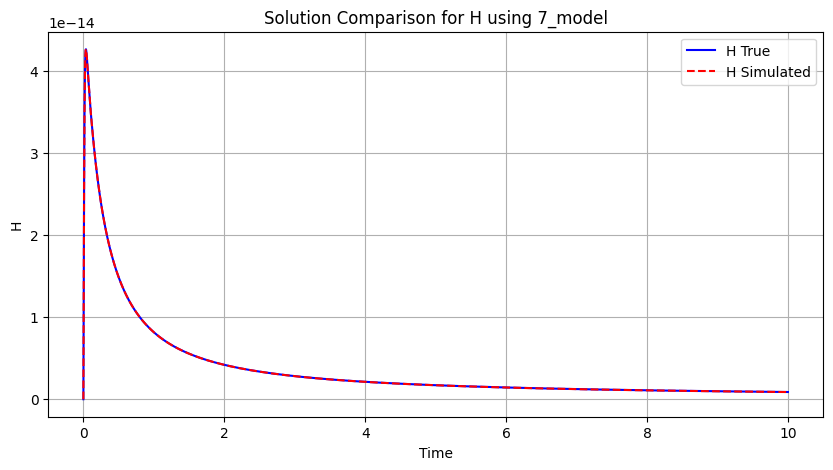

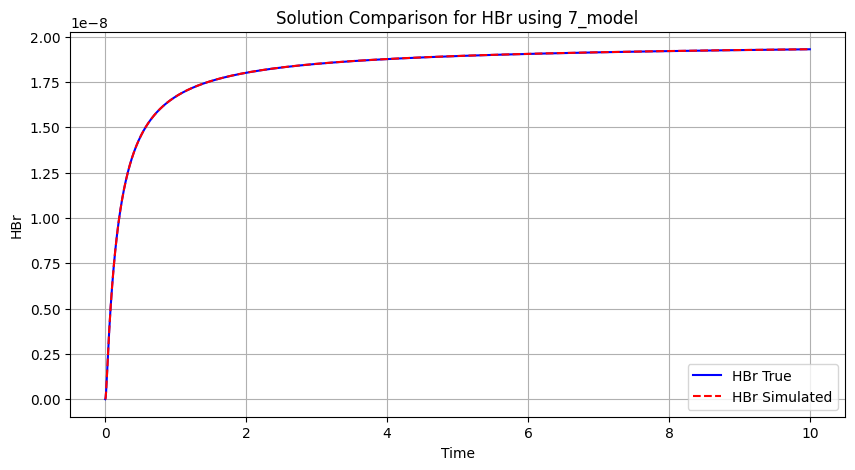

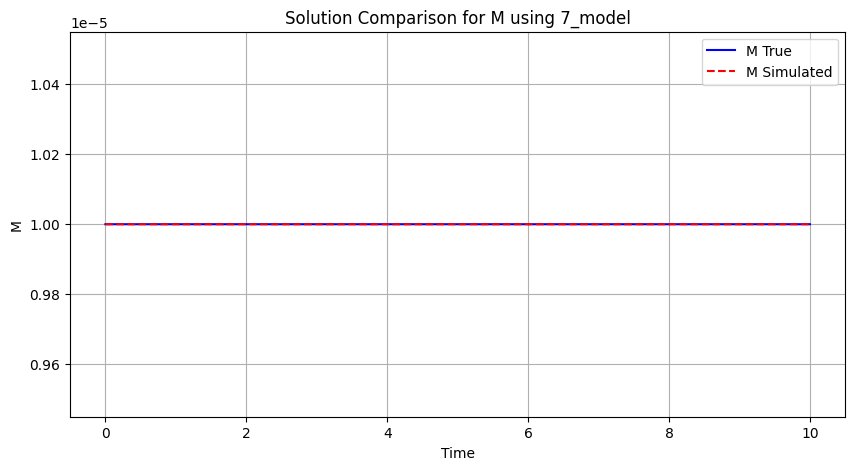

In [14]:
# visualize.plot_best_model_solution('nmse_mean', fixed_params={'weight_std': 0})
model = "7_model"
visualize.plot_model_solution(model, save=False)

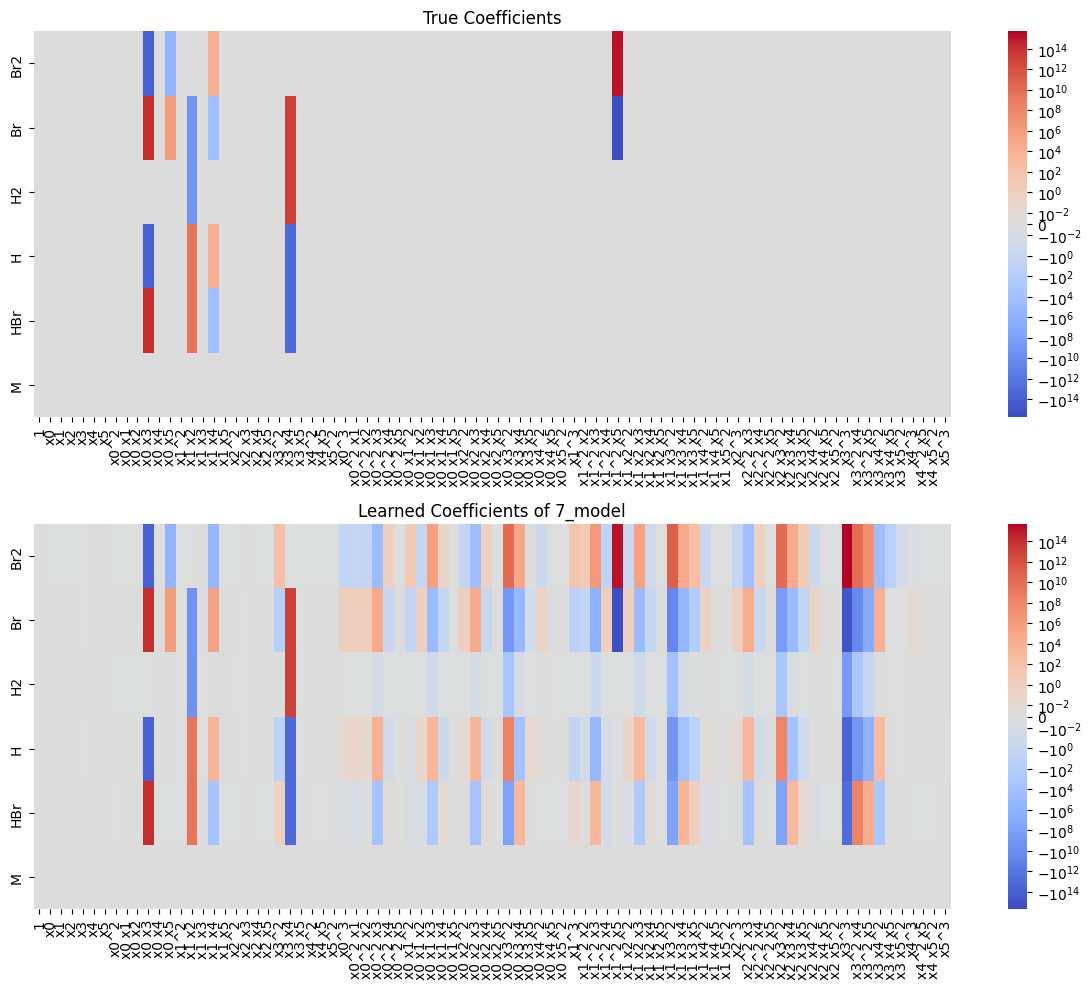

In [15]:
# visualize.plot_best_model_coefficients('nmse_mean', fixed_params={'weight_std': 0})
visualize.plot_coefficients(model, save=False)